In [1]:
import random
import numpy
import matplotlib.pyplot as plt
import joblib
from outlier_cleaner import outlierCleaner

In [2]:
### load up some practice data with outliers in it
ages = joblib.load( open("practice_outliers_ages.pkl", "rb") )
net_worths = joblib.load( open("practice_outliers_net_worths.pkl", "rb") )


In [3]:
### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
from sklearn.model_selection import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

In [4]:
### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(ages_train,net_worths_train)


LinearRegression()

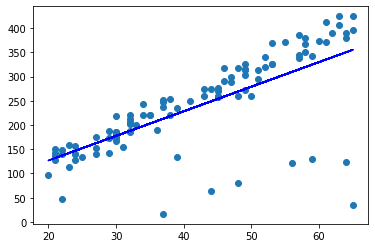

slope: [[5.07793064]]
intercept: [25.21002155]
score: 0.8782624703664672


In [5]:
try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()
print('slope:',reg.coef_)
print('intercept:',reg.intercept_)
print('score:', reg.score(ages_test,net_worths_test))

In [6]:
### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print("Your regression object doesn't exist, or isn't name reg")
    print("Can't make predictions to use in identifying outliers")

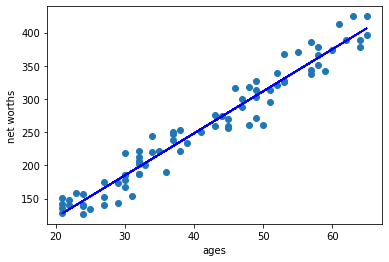

slope: [[6.33249975]]
intercept: [-5.13434998]
score: 0.9824752146259328


In [7]:
### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print("You don't seem to have regression imported/created,")
        print("   or else your regression object isn't named reg")
        print("   either way, only draw the scatter plot of the cleaned data")
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()
    print('slope:',reg.coef_)
    print('intercept:',reg.intercept_)
    print('score:', reg.score(ages_test,net_worths_test))

else:
    print("outlierCleaner() is returning an empty list, no refitting to be done")